In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn.cluster import KMeans
from scipy import ndimage
import skimage as skim
from skimage import color
from skimage import io
from skimage.color import label2rgb
from skimage.measure import regionprops
import pandas as pd

In [4]:
image = skim.io.imread("Salmon/617.jpg")  # abro el archivo de imagen
labImage = color.rgb2lab(image, illuminant='D65', observer='2')  # img_Lab es un array de numpy de 3 dimensiones (L, a, b)

In [5]:
r = image[:, :, 0];             # red channel
g = image[:, :, 1];             # green channel
b = image[:, :, 2];             # blue channel
L = labImage[:, :, 0];            
A = labImage[:, :, 1];             
B = labImage[:, :, 2];  

In [6]:
rgbMask = r > 100;
lMask = L < 65;
aMask = A > 10;
bMask = B > 10;

In [7]:
red = r * rgbMask * lMask * aMask * bMask;
green = g * rgbMask * lMask * aMask * bMask;
blue = b * rgbMask * lMask * aMask * bMask;

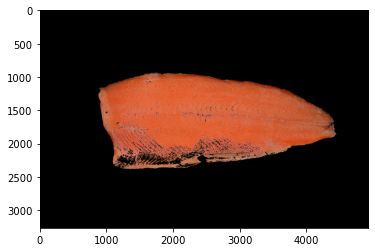

In [8]:
rgb = (red[..., np.newaxis], green[..., np.newaxis], blue[..., np.newaxis])
rgbImage = np.concatenate(rgb, axis=-1)
plt.imshow(rgbImage)

In [9]:
labeled, nr_objects = ndimage.label(rgbImage[:,:,0])  # Etiquetado de la imagen por el canal R
#fig, ax = plt.subplots(figsize=(10, 6))  # Creo un subplot para visualizar los objetos identificados
#ax.imshow(rgbImage)

#imagenes = {}  # Diccionario donde se almacenará cada objeto identificado y recortado
#i = 0  # Valor incial del contador i

for region in regionprops(labeled):  # Loop que itera en cada region identificada mediante regionprops en la imagen etiquetada anteriormente
    if region.area >= 100000:  # Condición para considerar regiones grandes, sirve como filtro
        y1, x1, y2, x2 = region.bbox  # Mediante el método bbox se extrae la información correspondiente a la posición de las regiones
        rgbImage1 = rgbImage[y1:y2, x1:x2, :]
#        rect = mpatches.Rectangle((x1, y1), x2 - x1, y2 - y1,  # utilizando este paquete se crean rectángulos alrededor de los objetos identificados
#                                   fill=False, edgecolor='red', linewidth=2)
#        ax.add_patch(rect) # Agrega el rectángulo al subplot creado anteriormente
#        imagenes[i] = rgbImage[y1:y2, x1:x2, :]  # Recorta el objeto identificado según las coordenadas de la región
#        i = i + 1  # Actualiza el valor del contador
#plt.tight_layout()
#plt.show()

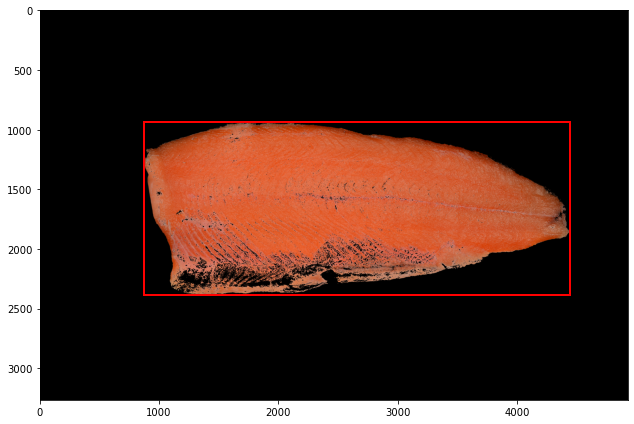

In [10]:
labeled, nr_objects = ndimage.label(rgbImage[:,:,0])  # Etiquetado de la imagen por el canal R
fig, ax = plt.subplots(figsize=(10, 6))  # Creo un subplot para visualizar los objetos identificados
ax.imshow(rgbImage)

imagenes = {}  # Diccionario donde se almacenará cada objeto identificado y recortado
i = 0  # Valor incial del contador i

for region in regionprops(labeled):  # Loop que itera en cada region identificada mediante regionprops en la imagen etiquetada anteriormente
    if region.area >= 100000:  # Condición para considerar regiones grandes, sirve como filtro
        y1, x1, y2, x2 = region.bbox  # Mediante el método bbox se extrae la información correspondiente a la posición de las regiones
        rect = mpatches.Rectangle((x1, y1), x2 - x1, y2 - y1,  # utilizando este paquete se crean rectángulos alrededor de los objetos identificados
                                   fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect) # Agrega el rectángulo al subplot creado anteriormente
        imagenes[i] = rgbImage[y1:y2, x1:x2, :]  # Recorta el objeto identificado según las coordenadas de la región
        i = i + 1  # Actualiza el valor del contador
plt.tight_layout()
plt.show()

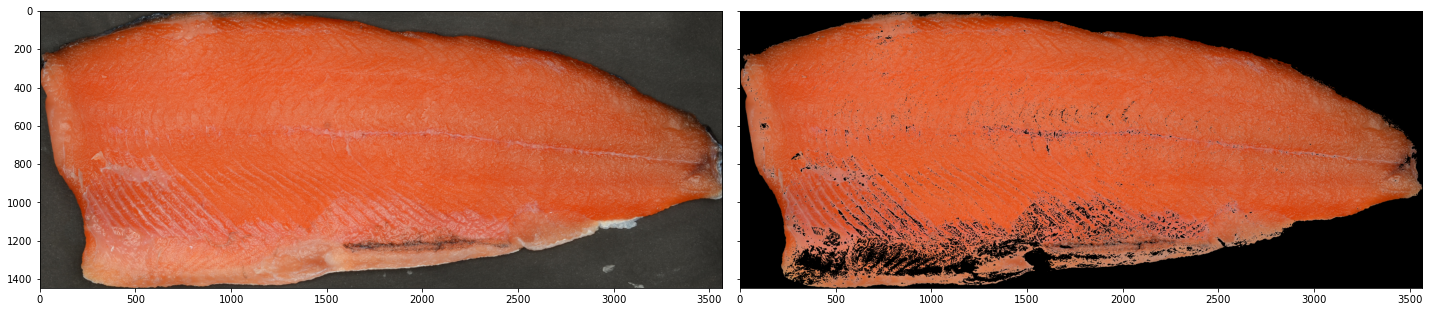

In [32]:
rgbImage2 = image[y1:y2, x1:x2, :]
fig, ax = plt.subplots(1,2,figsize=(20, 40),tight_layout=True, sharey=True)
ax[0].imshow(rgbImage2);
ax[1].imshow(imagenes[0]);


In [22]:
fotos = {'imagen1': skim.img_as_ubyte(imagenes[0])}#,
#         'imagen2': skim.img_as_ubyte(imagenes[1]),
#         'imagen3': skim.img_as_ubyte(imagenes[2])}

In [33]:
skim.io.imsave("salmon_1.png",imagenes[0])
#skim.io.imsave("melaessiccata 0.5h_2.png",fotos['imagen2'])
#skim.io.imsave("melaessiccata 0.5h_3.png",fotos['imagen3'])

In [34]:
df = pd.DataFrame(columns = ['Muestra', 'L', 'a', 'b'])  # DataFrame donde se almacenarán los valores de color

objetos_lab = {}  # Diccionario donde se guardan las imagenes convertidas a L a b
i = 0  # Valor incial del contador i
for imagen in fotos:
    objetos_lab[i] = color.rgb2lab(fotos[imagen], illuminant='D65', observer='2')  # Convierte cada imagen a L a b
    L = np.round(np.nanmean(np.where(objetos_lab[i][:,:,0]!=0,objetos_lab[i][:,:,0],np.nan)),decimals=2)  # Calcula el promedio de L en la primer matriz sin tener en cuenta los 0
    a = np.round(np.nanmean(np.where(objetos_lab[i][:,:,1]!=0,objetos_lab[i][:,:,1],np.nan)),decimals=2)  # porque los convierte en NaN y la función promedio no los considera
    b = np.round(np.nanmean(np.where(objetos_lab[i][:,:,2]!=0,objetos_lab[i][:,:,2],np.nan)),decimals=2)  # además redondea los valores obtenidos a 2 decimales
    nueva_fila = {'Muestra':imagen, 'L':L, 'a':a, 'b':b} # Diccionario donde almacena los valores calculados en cada Loop
    df = df.append(nueva_fila, ignore_index=True)  # Agrega los valores calculados al DataFrame inicial
    i = i+1
df.to_excel('tabla_color.xlsx',index=False)  # Guarda la tabla de colores en un archivo excel
df

,Muestra,L,a,b
0,imagen1,54.73,41.46,42.09
